In [8]:
RESULT_DIR = "/Users/niko/Downloads/results"

In [12]:
import os
import json

In [15]:
files = os.listdir(RESULT_DIR)
files = [f for f in files if f.endswith(".json")]

with open(os.path.join(RESULT_DIR, files[0]), "r") as f:
    final = json.load(f)

with open(os.path.join(RESULT_DIR, files[1]), "r") as f:
    partials = json.load(f)

In [26]:
partials

[{'result': {'result': [{'conf': 0.085999,
     'start': 0.3,
     'end': 0.8,
     'word': 'bride'}],
   'text': 'bride'},
  'time': 1.348890159279108},
 {'result': {'result': [{'conf': 0.359619,
     'start': 0.3,
     'end': 1.02,
     'word': 'brighter'},
    {'conf': 0.994629, 'start': 1.02, 'end': 1.32, 'word': 'than'},
    {'conf': 0.98877, 'start': 1.32, 'end': 1.64, 'word': 'early'},
    {'conf': 0.992188, 'start': 1.64, 'end': 1.92, 'word': 'dawn'}],
   'text': 'brighter than early dawn'},
  'time': 2.3482836354523897},
 {'result': {'result': [{'conf': 0.364258,
     'start': 0.3,
     'end': 0.98,
     'word': 'brighter'},
    {'conf': 0.999512, 'start': 0.98, 'end': 1.32, 'word': 'than'},
    {'conf': 0.979004, 'start': 1.32, 'end': 1.68, 'word': 'early'},
    {'conf': 0.979248, 'start': 1.68, 'end': 2.24, 'word': "dawn's"},
    {'conf': 0.997559, 'start': 2.24, 'end': 2.58, 'word': 'most'},
    {'conf': 0.973145, 'start': 2.58, 'end': 2.92, 'word': 'brilliant'}],
   'text'

In [18]:
import matplotlib.pyplot as plt
import numpy as np

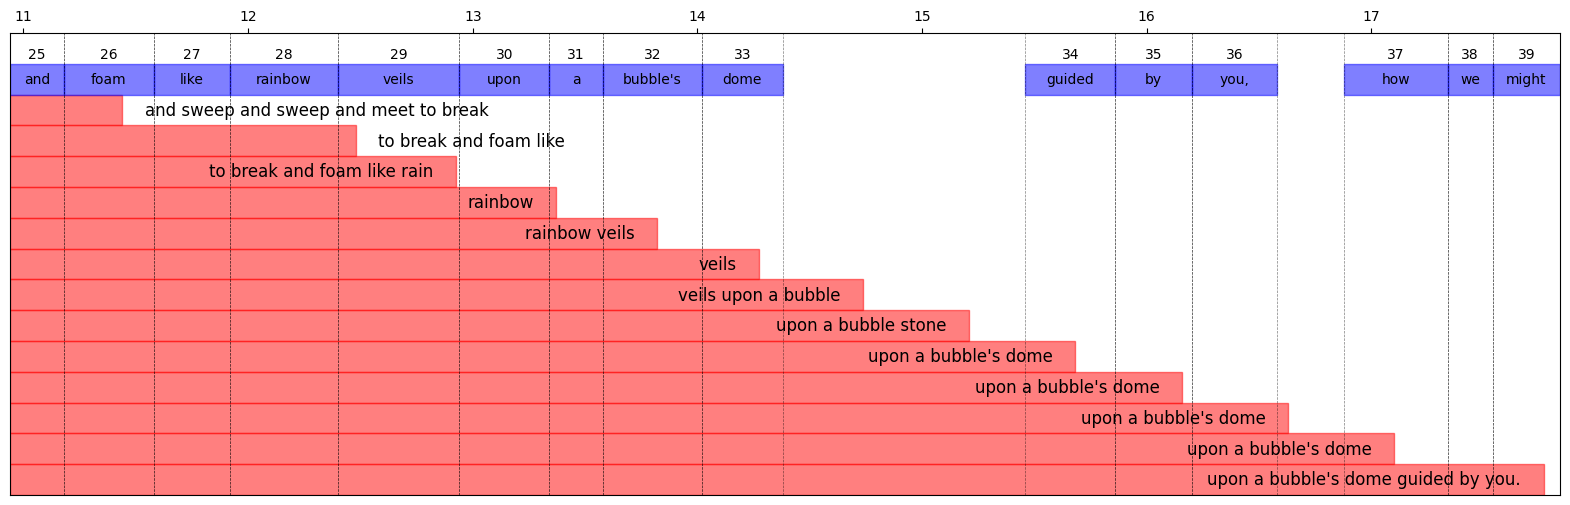

In [119]:
window_start = 25
window_end = 40

words = final[window_start:window_end]

window_start_t = min(word["start"] for word in words)
window_end_t = max(word["end"] for word in words)
window_width = window_end_t - window_start_t

predictions = [p for p in partials if window_start_t <= p["time"] <= window_end_t]
predictions = predictions[::-1]

fig, ax = plt.subplots(figsize=(20, 6))

# Draw predictions (red, bottom layer)
for i, partial in enumerate(predictions):
    start = window_start_t
    end = partial["time"]
    ax.add_patch(plt.Rectangle((start, i), end - start, 1, color="red", alpha=0.5))

    box_right = end
    is_left_side = (box_right - window_start_t) < (window_width / 4)

    if is_left_side:
        # Text outside right edge, left-aligned
        ax.text(box_right + 0.1, i + 0.5, partial["result"]["text"],
                ha="left", va="center", fontsize=12)
    else:
        # Text inside box, right-aligned
        ax.text(box_right - 0.1, i + 0.5, partial["result"]["text"],
                ha="right", va="center", fontsize=12)

# Draw words (blue, top layer)
word_y = len(predictions)
for i, word in enumerate(words):
    start = word["start"]
    end = word["end"]
    ax.add_patch(plt.Rectangle((start, word_y), end - start, 1, color="blue", alpha=0.5))
    ax.text((start + end) / 2, word_y + 0.5, word["word"], ha="center", va="center", fontsize=10)
    ax.text((start + end) / 2, word_y + 1.3, f"{window_start + i}", ha="center", va="center", fontsize=10, color="black")
    ax.axvline(start, color="black", linestyle="--", linewidth=0.5, alpha=0.5)
    ax.axvline(end, color="black", linestyle="--", linewidth=0.5, alpha=0.5)

# Axis settings
ax.set_xlim(window_start_t, window_end_t)
ax.set_ylim(0, word_y + 2)
ax.set_yticks([])
ax.xaxis.tick_top()

plt.show()

In [104]:
partials[9]

{'result': {'result': [{'conf': 0.991211,
    'start': 7.6,
    'end': 8.36,
    'word': 'and'},
   {'conf': 0.99707, 'start': 8.36, 'end': 8.94, 'word': 'sweep'},
   {'conf': 0.998535, 'start': 8.94, 'end': 9.44, 'word': 'and'},
   {'conf': 1e-06, 'start': 9.44, 'end': 9.64, 'word': 'sweep'},
   {'conf': 0.830566, 'start': 9.64, 'end': 9.64, 'word': 'and'},
   {'conf': 0.000307, 'start': 9.64, 'end': 9.72, 'word': 'sweep'},
   {'conf': 0.622559, 'start': 9.72, 'end': 9.84, 'word': 'and'},
   {'conf': 0.045868, 'start': 9.84, 'end': 9.84, 'word': 'sweep'},
   {'conf': 0.637207, 'start': 9.84, 'end': 9.94, 'word': 'and'},
   {'conf': 0.147705, 'start': 9.94, 'end': 9.94, 'word': 'sweep'},
   {'conf': 0.666992, 'start': 9.94, 'end': 9.94, 'word': 'and'},
   {'conf': 0.249023, 'start': 9.94, 'end': 9.94, 'word': 'sweep'},
   {'conf': 0.689453, 'start': 9.94, 'end': 9.94, 'word': 'and'},
   {'conf': 0.339355, 'start': 9.94, 'end': 9.94, 'word': 'sweep'},
   {'conf': 0.706055, 'start': 9.94

In [92]:
def word_first_correct_response(final_index, acceptance_time=1.0):
    '''
    Given the index of a final word, return the first partial response that contains the word
    and the time it was produced.
    '''
    target_word = final[final_index]
    word_start = target_word["start"]
    word_end = target_word["end"]
    word = target_word["word"]
    for i, partial in enumerate(partials):
        if partial["time"] < word_start:
            continue
        for w in partial["result"]["result"]:
            if w["word"] == word and w["start"] >= word_start - acceptance_time and w["end"] <= word_end + acceptance_time:
                return {
                    "timestep": i,
                    "observation_time": partial["time"],
                    "latency": partial["time"] - word_start,
                }

def word_first_final_response(final_index, acceptance_time=1.0):
    '''
    Given the index of a final word, return the partial response after which the word does not change anymore and thus becomes final.
    '''
    target_word = final[final_index]
    word_start = target_word["start"]
    word_end = target_word["end"]
    word = target_word["word"]
    last_found_at_index = None
    candidate = None
    for i, partial in enumerate(partials):
        if partial["time"] < word_start:
            continue
        if (len(partial["result"]["result"])
            and partial["result"]["result"][0]["start"] > word_end + acceptance_time
        ):
            return candidate
        for w in partial["result"]["result"]:
            if w["word"] == word and w["start"] >= word_start - acceptance_time and w["end"] <= word_end + acceptance_time:
                last_found_at_index = i
                if (
                    candidate is None
                    or last_found_at_index < i-1 
                ):
                    candidate = {
                        "timestep": i,
                        "observation_time": partial["time"],
                        "latency": partial["time"] - word_start,
                    }
    return candidate
        
            

wfc = [word_first_correct_response(i) for i in range(len(final))]
wfc_latency = np.array([r["latency"] for r in wfc])

ffc = [word_first_final_response(i) for i in range(len(final))]
ffc_latency = np.array([r["latency"] for r in ffc])

In [98]:
ffc_latency.mean().item()

2.0420164100480522

In [ ]:
word_first_correct_response(282)

{'timestep': 211,
 'observation_time': 132.54516133666039,
 'latency': 7.3851613366603885}

In [100]:
word_first_final_response(0)

{'timestep': 1,
 'observation_time': 2.3482836354523897,
 'latency': 2.04828363545239}

In [99]:
wfc_latency.mean().item()

2.0420164100480522